<a href="https://colab.research.google.com/github/sakshiii819/Airbnb-Booking-Analysis-Sakshi-Juneja_/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/drive/MyDrive/AlmaB/Colab Notebooks/airbnb/'


In [ ]:
df = pd.read_csv(file_path + 'Airbnb NYC 2019.csv')

In [ ]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [ ]:
len(df)

48895

In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#dropping host column to maintain privacy
#df.drop(['host_name'], axis=1, inplace=True)

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [ ]:
df.reviews_per_month.isnull().sum()

0

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

I have to find busiest airbnb--it will be based on number of reviews and number of property listings.

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#grouping data using host_id, host_name, number_of reviews to know busiest host:
busy_host_df=df.groupby('host_id')['number_of_reviews'].sum().sort_values(ascending=False).reset_index()
name_df=df.groupby('host_id')['host_name'].unique().reset_index()

# Merging the two dataframes using left join
merged_busy_host_df = pd.merge(busy_host_df,name_df, on='host_id', how='inner').iloc[:20].set_index('host_id')
merged_busy_host_df

,number_of_reviews,host_name
host_id,,
37312959,2273,[Maya]
344035,2205,[Brooklyn& Breakfast -Len-]
26432133,2017,[Danielle]
35524316,1971,[Yasu & Akiko]
40176101,1818,[Brady]
4734398,1798,[Jj]
16677326,1355,[Alex And Zeena]
6885157,1346,[Randy]
219517861,1281,[Sonder (NYC)]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

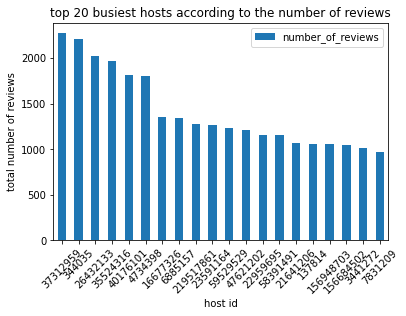

In [ ]:
merged_busy_host_df.plot(kind='bar')

plt.title("top 20 busiest hosts according to the number of reviews")
plt.ylabel('total number of reviews')
plt.xlabel('host id')
plt.rcParams['figure.figsize'] = (10, 5)
plt.xticks(rotation=45)

In [ ]:
host_id_and_price = df.groupby('host_id')['price'].mean().sort_values(ascending=True).reset_index()
host_id_and_price

,host_id,price
0,10132166,0.0
1,13709292,0.0
2,197169969,10.0
3,33511962,10.0
4,47336995,10.0
...,...,...
37452,1235070,9999.0
37453,4382127,9999.0
37454,5143901,10000.0
37455,72390391,10000.0


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df_based_on_reviews = df['number_of_reviews'].value_counts().reset_index()
df_based_on_reviews 


,index,number_of_reviews
0,0,10052
1,1,5244
2,2,3465
3,3,2520
4,4,1994
...,...,...
389,404,1
390,436,1
391,388,1
392,341,1


In [ ]:
# to know host id and number of reviews:
reviews_df=df.groupby('host_id')['number_of_reviews'].count().sort_values(ascending=False).reset_index().iloc[0:5]
reviews_df=reviews_df.set_index('host_id')
reviews_df

,number_of_reviews
host_id,
219517861,327
107434423,232
30283594,121
137358866,103
16098958,96


Text(0, 0.5, 'number_of_reviews')

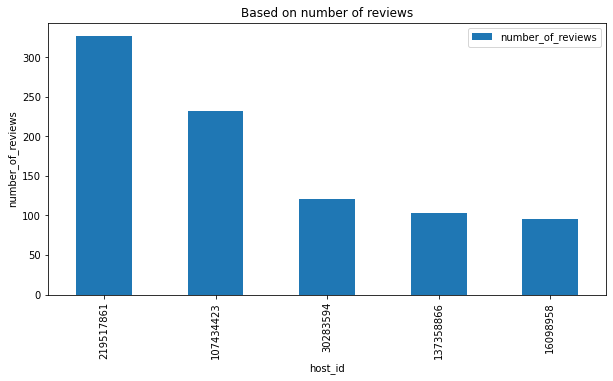

In [ ]:
reviews_df.plot(kind='bar')

plt.title("Based on number of reviews")
plt.xlabel('host_id')
plt.ylabel('number_of_reviews')
#plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
#taking top 5 enteries based on reviews per month and host id:
reviews_per_month_df=df.groupby(by='host_id')['reviews_per_month'].sum().sort_values(ascending=False).reset_index().iloc[0:5]
reviews_per_month_df.set_index('host_id',inplace=True)

Text(0, 0.5, 'reviews_per_month')

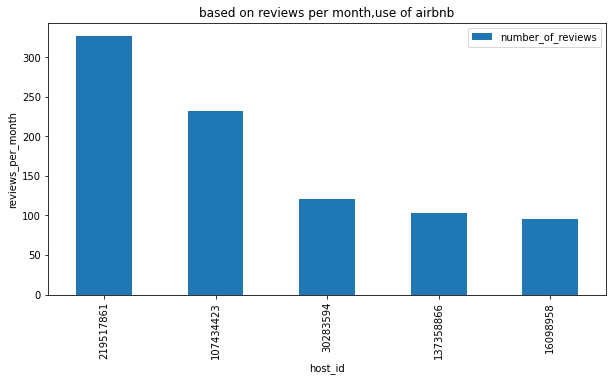

In [ ]:
reviews_df.plot(kind='bar')

plt.title("based on reviews per month,use of airbnb")
plt.xlabel('host_id')
plt.ylabel('reviews_per_month')
#plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
# to know maximum number listings of a host
prop_count_df=df.groupby('host_id')['name'].count().sort_values(ascending=False).head(20)
name_df=df.groupby('host_id')['host_name'].unique().reset_index()

# Merging the two dataframes using left join
merged_prop_count_host_df = pd.merge(prop_count_df,name_df, on='host_id', how='inner').iloc[:20].set_index('host_id')
merged_prop_count_host_df

,name,host_name
host_id,,
219517861,327,[Sonder (NYC)]
107434423,232,[Blueground]
30283594,121,[Kara]
137358866,103,[Kazuya]
16098958,96,[Jeremy & Laura]
12243051,96,[Sonder]
61391963,91,[Corporate Housing]
22541573,87,[Ken]
200380610,65,[Pranjal]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

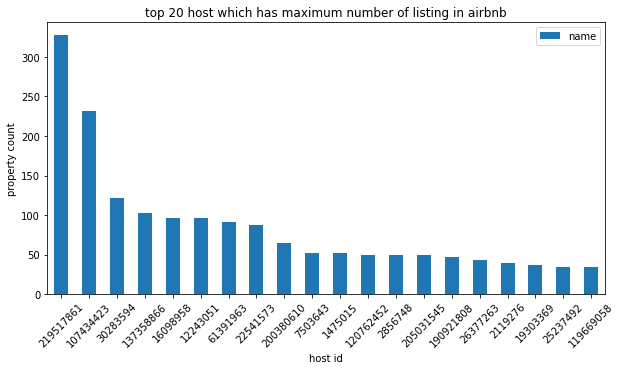

In [ ]:
merged_prop_count_host_df.plot(kind='bar')

plt.title("top 20 host which has maximum number of listing in airbnb")
plt.ylabel('property count')
plt.xlabel('host id')
plt.rcParams['figure.figsize'] = (10, 5)
plt.xticks(rotation=45)

We can see that from two graphs,number of views and reviews per month that host id = 219517861 is busiest because he has reviews per month and number of reviews maximum, that means he keeps his platform activated in terms of social media and he has more properties than other hosts.

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')